# 데이터 로드

In [59]:
import pandas as pd

df = pd.read_csv('/content/dataset2.csv')
display(df.head())

,timestamp,pitch,yaw,roll,gaze_lr_avg,gaze_ud_avg,gaze_lr_diff,gaze_ud_diff,face_count,face_visible,label,video_id
0,1.765862e+09,-170.789886,1.276580,-0.386461,0.5,0.470054,1.0,0.269340,1,1,0,normal_1
1,1.765862e+09,-170.833117,-4.533516,-0.678117,0.5,0.485227,1.0,0.196485,1,1,0,normal_1
2,1.765862e+09,-171.204790,-4.152060,-0.514789,0.5,0.461575,1.0,0.170901,1,1,0,normal_1
3,1.765862e+09,-170.600003,-3.647237,-0.335571,0.5,0.434369,1.0,0.306352,1,1,0,normal_1
4,1.765862e+09,-170.316336,-3.125162,-0.366629,0.5,0.453637,1.0,0.287457,1,1,0,normal_1


# 데이터 분석

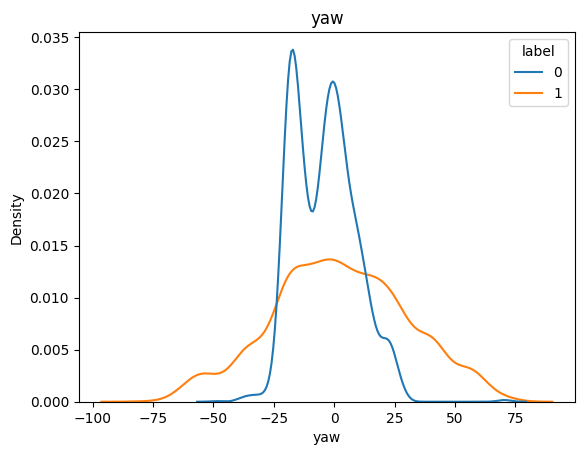

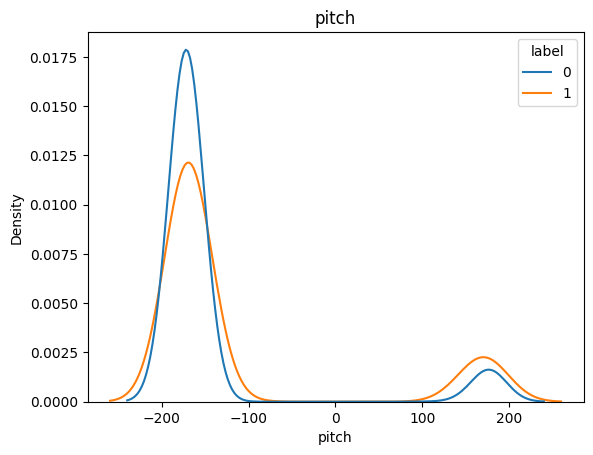

/tmp/ipython-input-4289565840.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", common_norm=False)


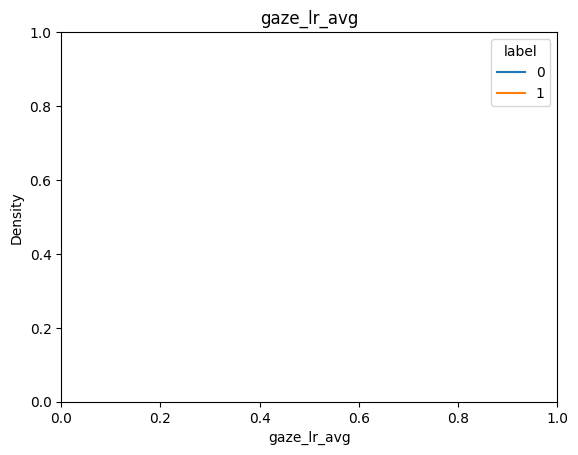

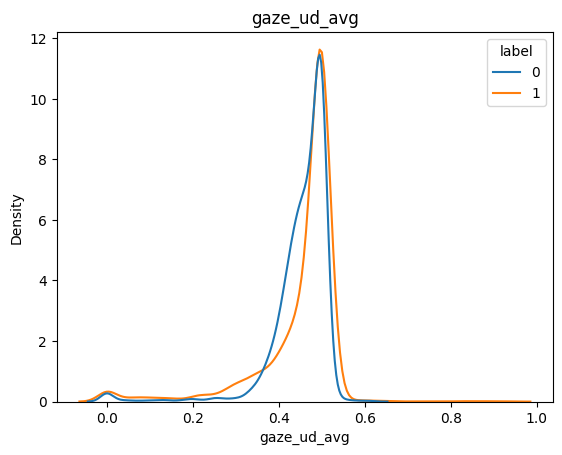

/tmp/ipython-input-4289565840.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="label", common_norm=False)


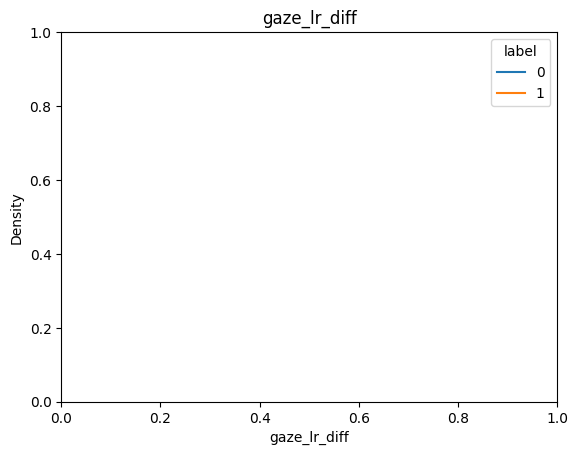

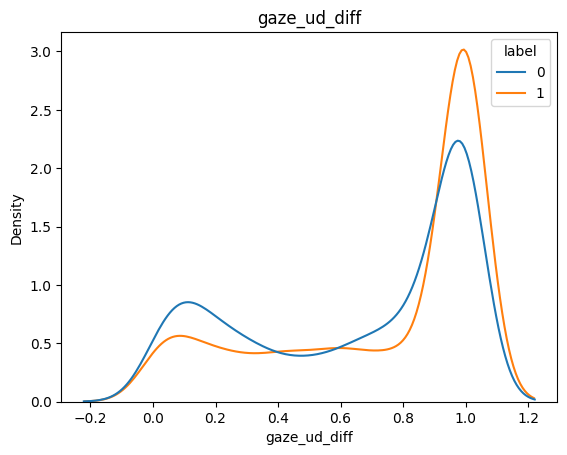

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in [
    "yaw", "pitch",
    "gaze_lr_avg", "gaze_ud_avg",
    "gaze_lr_diff", "gaze_ud_diff",
]:
    sns.kdeplot(data=df, x=col, hue="label", common_norm=False)
    plt.title(col)
    plt.show()

In [61]:
df["abs_yaw"] = df["yaw"].abs()
df["yaw_bin"] = (df["abs_yaw"] > 20).astype(int)

In [62]:
df["abs_pitch"] = df["pitch"].abs()
df["pitch_extreme"] = (df["abs_pitch"] > 120).astype(int)

In [63]:
df["gaze_lr_from_center"] = (df["gaze_lr_avg"] - 0.5).abs()

In [64]:
df["ud_unstable"] = (df["gaze_ud_diff"] > 0.6).astype(int)

In [65]:
df = df.sort_values(["video_id", "timestamp"])

df["off_center"] = (
    (df["abs_yaw"] > 20) |
    (df["gaze_lr_from_center"] > 0.2)
).astype(int)

df["off_center_streak"] = (
    df.groupby("video_id")["off_center"].cumsum()
)

In [66]:
df.head()

,timestamp,pitch,yaw,roll,gaze_lr_avg,gaze_ud_avg,gaze_lr_diff,gaze_ud_diff,face_count,face_visible,label,video_id,abs_yaw,yaw_bin,abs_pitch,pitch_extreme,gaze_lr_from_center,ud_unstable,off_center,off_center_streak
2680,1.765862e+09,-172.627846,-12.495275,0.180229,0.5,0.150926,1.0,0.301853,1,1,1,cheating_1,12.495275,0,172.627846,1,0.0,0,0,0
2681,1.765862e+09,-171.648988,-9.308686,0.297613,0.5,0.000000,1.0,0.000000,1,1,1,cheating_1,9.308686,0,171.648988,1,0.0,0,0,0
2682,1.765862e+09,-140.867783,7.267744,178.804867,0.5,0.500000,1.0,1.000000,1,1,1,cheating_1,7.267744,0,140.867783,1,0.0,1,0,0
2683,1.765862e+09,-161.811881,10.239863,-9.317679,0.5,0.500000,1.0,1.000000,1,1,1,cheating_1,10.239863,0,161.811881,1,0.0,1,0,0
2684,1.765862e+09,-166.259650,3.860428,-8.419734,0.5,0.417082,1.0,0.834163,1,1,1,cheating_1,3.860428,0,166.259650,1,0.0,1,0,0


# 데이터 전처리

In [67]:
df = df.drop(columns=['timestamp'])
display(df.head())

,pitch,yaw,roll,gaze_lr_avg,gaze_ud_avg,gaze_lr_diff,gaze_ud_diff,face_count,face_visible,label,video_id,abs_yaw,yaw_bin,abs_pitch,pitch_extreme,gaze_lr_from_center,ud_unstable,off_center,off_center_streak
2680,-172.627846,-12.495275,0.180229,0.5,0.150926,1.0,0.301853,1,1,1,cheating_1,12.495275,0,172.627846,1,0.0,0,0,0
2681,-171.648988,-9.308686,0.297613,0.5,0.000000,1.0,0.000000,1,1,1,cheating_1,9.308686,0,171.648988,1,0.0,0,0,0
2682,-140.867783,7.267744,178.804867,0.5,0.500000,1.0,1.000000,1,1,1,cheating_1,7.267744,0,140.867783,1,0.0,1,0,0
2683,-161.811881,10.239863,-9.317679,0.5,0.500000,1.0,1.000000,1,1,1,cheating_1,10.239863,0,161.811881,1,0.0,1,0,0
2684,-166.259650,3.860428,-8.419734,0.5,0.417082,1.0,0.834163,1,1,1,cheating_1,3.860428,0,166.259650,1,0.0,1,0,0


In [68]:
df = df.drop(columns=['video_id'])

In [69]:
df.head(5)

,pitch,yaw,roll,gaze_lr_avg,gaze_ud_avg,gaze_lr_diff,gaze_ud_diff,face_count,face_visible,label,abs_yaw,yaw_bin,abs_pitch,pitch_extreme,gaze_lr_from_center,ud_unstable,off_center,off_center_streak
2680,-172.627846,-12.495275,0.180229,0.5,0.150926,1.0,0.301853,1,1,1,12.495275,0,172.627846,1,0.0,0,0,0
2681,-171.648988,-9.308686,0.297613,0.5,0.000000,1.0,0.000000,1,1,1,9.308686,0,171.648988,1,0.0,0,0,0
2682,-140.867783,7.267744,178.804867,0.5,0.500000,1.0,1.000000,1,1,1,7.267744,0,140.867783,1,0.0,1,0,0
2683,-161.811881,10.239863,-9.317679,0.5,0.500000,1.0,1.000000,1,1,1,10.239863,0,161.811881,1,0.0,1,0,0
2684,-166.259650,3.860428,-8.419734,0.5,0.417082,1.0,0.834163,1,1,1,3.860428,0,166.259650,1,0.0,1,0,0


In [70]:
df = df.drop(columns=['face_visible','face_count'])

In [71]:
df = df.drop(columns=['pitch','yaw','roll'])

In [72]:
df = df.drop(columns=['gaze_lr_avg','gaze_ud_avg'])

# train/test 데이터 분리

In [73]:
# 1. 랜덤 고정
import os
import numpy as np
import random
import torch

def reset_seeds(seed=42):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )


In [74]:
reset_seeds()
# train dataset의 사망과 생존의 데이터 분포
new_survived = pd.Categorical(df["label"]) # object형-> category 타입으로 변환
new_survived = new_survived.rename_categories(["normal","cheat"]) # 0 -> Died, 1 -> Survived 로 변환

new_survived.describe()

,counts,freqs
categories,,
normal,2680,0.534717
cheat,2332,0.465283


In [75]:
from sklearn.model_selection import train_test_split

reset_seeds()

# 1. target 분리
y = df['label'] # target
X = df.drop(['label'], axis=1) # feature

# 2. train/test 분리 (7:3 으로 분리)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=df['label'])
# --> stratify=ori_train['survived'] : 분리할 때, 생존자/죽은자 분포를 원래 데이터와 비슷하게 나누는 것
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((4009, 10), (1003, 10), (4009,), (1003,))

In [76]:
reset_seeds()
train = X_tr.copy()
test = X_te.copy()

# Training

## RandomForestClassifier

In [80]:
X_tr.isnull().sum().sum(), X_te.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [99]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=4,
    random_state=42,
    n_jobs=-1,
)

forest=clf.fit(X_tr, y_tr)

In [100]:
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 0.9770516338238963 / 테스트용 평가지표: 0.9531405782652044


### 분석

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = forest.predict(X_te)

print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[526  10]
 [ 37 430]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       536
           1       0.98      0.92      0.95       467

    accuracy                           0.95      1003
   macro avg       0.96      0.95      0.95      1003
weighted avg       0.95      0.95      0.95      1003



## HistGradientBoostingClassifier

In [112]:
from sklearn.ensemble import HistGradientBoostingClassifier

gb = HistGradientBoostingClassifier(
    max_depth=4,          # 너무 크지 않게
    learning_rate=0.1,
    max_iter=300,
    random_state=42,
)

gb.fit(X_tr, y_tr)

print("GB train:", gb.score(X_tr, y_tr))
print("GB test :", gb.score(X_te, y_te))

GB train: 0.9890246944375156
GB test : 0.959122632103689


In [113]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = gb.predict(X_te)

print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[517  19]
 [ 22 445]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       536
           1       0.96      0.95      0.96       467

    accuracy                           0.96      1003
   macro avg       0.96      0.96      0.96      1003
weighted avg       0.96      0.96      0.96      1003



# export

In [114]:
import joblib
joblib.dump(gb, "anti_cheat_hgb.pkl")

['anti_cheat_hgb.pkl']